# Data Scientist Challenge - LATAM Airlines

### Busqueda bibliográfica

Lo primero que hice fue una búsqueda bibliográfica no demasiada extensa por cuestiones de tiempo, para intentar ver qué había hecho sobre el tema, se encontraron algunos artículos y páginas interesantes:

https://ddd.uab.cat/pub/tfg/2016/169883/MartinezDomenechNerea-TFGAa2015-16.pdf (Este documento que aparentemente es una tesis de grado, fue util para como referencia de variables y algoritmos usados. Además tiene la estimación del beneficio económico de prevenir retrasos en vuelos. Algo que no siempre es fácil de conseguir en los proyectos de DS)

https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial (este articulo en formato jupyter notebook puede ser util para obtener ideas si es necesario hacer una exploración de datos más detallada, y como referencia de variables usadas)

https://medium.com/@diegitsen/predecir-retrasos-de-vuelo-en-el-aeropuerto-de-madrid-parte-2-c%C3%B3digo-en-python-cc4c39222577 (este articulo finalmente no aportó mucho pero fue una buena referencia como para empezar a entrar en tema, ver qué había hecho y evitar repetir lo que ya es conocido.)


Por otro lado hice una exploración en PowerBI, que si bien no es parte del ejercicio, es una excelente herramienta para un primer encuentro con los datos, a mi entender superior a Jupyter/Python. En el pasado he obtenido resultados muy buenos por la velocidad con que se puede desplegar un tablero y empezar a jugar con el mismo. Creo que es bueno para un Científico de datos tener varias herramientas en la baulera. Se agregaron algunas capturas de los gráficos más interesantes para este caso.

In [39]:
#Importación de las ibrerías que se usaron en el notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

### Datos

In [40]:
#Lectura de datos

df = pd.read_csv('data/dataset_SCL.csv')

#Algunas transformaciones que fueron necesarias

df[['Fecha-I', 'Fecha-O']] = df[['Fecha-I', 'Fecha-O']].astype('datetime64[ns]') # Esto es para poder hacer operaciones como dt.hour
df['Vlo-I'] = "'" + df['Vlo-I'].map(str) + "'" #Esto es para que no haya errores porque algunos vuelos eran numéricos y otros alfanuméricos
df['Vlo-O'] = "'" + df['Vlo-O'].map(str) + "'" #idem anterior

C:\Users\andrew.mercader\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Ejercicio 1: Visualización y primer entendimiento de los datos

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Introducción:  
  
Se considera que la intención de esta pregunta es que se haga una exploración preliminar y visualización de los datos sin limitarse al problema de predicción que enmarca el desafío.  
Por tal motivo se procedió a escribir un script que automáticamente tome todas las variables del dataset y las muestre en [Pie charts](#Pie_charts) y en [Bar charts](#Bar_charts) (con un limite de categorías).  
Como esto ocupa mucho espacio, hay algunos gráficos que carecen de sentido (por ejemplo Pie_chart: Fecha-I) y otros aportan poca información (como por ejemplo Pie_chart: Ori-O, ya que el 100% de los vuelos tienen origen en SCEL, es decir el aeropuerto de Santiago de Chile) se dejaron todos los gráficos en un [Apéndice](#Apendice). Y se traerán los más importantes a esta sección.
Por otro lado se exploró la información disponible en las funciones describe y info de pandas, por cuestiones de claridad la misma también se deja en la sección [Apéndice](#Apendice).
Asimismo se realizó un análisis exploratorio en PowerBI, que si bien no se puede visualizar  desde este notebook, como ya veremos, es una herramienta superior para navegar/explorar datos, disparador de ideas y preguntas para hacerle a los datos. De esta se tomaron las capturas más importantes y se incluyeron como imágenes.  
  
Exploración:  

Mirando la información del [Apéndice](#Apendice) vemos que hay 68205 filas de datos que cada una corresponde a un vuelo distinto. Las Fechas Programadas se programan con un detalle de intervalos de 5 minutos, mientras que las Fechas de Operación tienen un detalle al minuto. Además se puede corroborar que la totalidad de los vuelos tienen como origen el aeropuerto SCEL.  
  
En la sección [Pie_charts_elegidos](#Pie_charts_elegidos): 
  
- Emp-I podemos observar que LAN es la empresa con mayor cantidad de vuelos con el 55.1 %, seguida por SKU.  
- En el gráfico OPERA se ve que el Grupo Latam tiene un porcentaje de vuelos aún mayor llegando al 60%.  
- TIPOVUELO muestra que el 54.2% de los vuelos es nacional siendo el resto internacional.  
- En SIGLADES podemos ver que las principales ciudades de destino, siendo la principal Buenos Aires seguida por Antofagasta.  

En la sección [Bar_charts_elegidos](#Bar_charts_elegidos):  

- Se puede ver en DIANOM que Viernes es el día con más vuelos, seguido por el Jueves.    
- En VlO-O vemos que el Número de vuelo programado que más veces viajó en el año fue el '174' con 649 vuelos, seguido por el '11' con 646 (detalles numéricos obtenidos mostrados en el [Apéndice](#Apendice).  
- Finalmente en Fecha-O se puede ver que la máxima frecuencia de vuelos es de 5 por minuto.
  
En la sección [Capturas PowerBI](#Capturas_PowerBI):  
  
- Primero podemos ver como los datos desplegados en un mapa, muestran claramente las rutas de las distintas aerolíneas. El caso de la primer captura es para los vuelos internacionales del Grupo LATAM.  
- También seleccionando los filtros se puede elegir ver solo las rutas nacionales para todos los operadores como el ejemplo de la segunda captura.  
  
- La siguiente captura muestra un Diagrama de Sankey donde por ejemplo podemos ver para los vuelos internacionales el Destino programado respecto al de operación. Se puede ver a simple vista que en ciertos casos, como el marcado con el cursor, hay cambios de destino. Esta información pude llegar a ser relevante para las predicciones y se discutirá más adelante.  
  
- Treemap complementa lo que ya vimos en [Pie_charts_elegidos](#Pie_charts_elegidos) mostrando la cantidad de Números de vuelo por Operador y Empresa. Si cada número de vuelo coincidiera con una aeronave distinta, estos números nos darían un buen indicio del tamaño de las distintas flotas que operan en SCEL.  
  
- Por último en el gráfico más interesante, vemos las Series Temporales de la cantidad de vuelos en función del tiempo para el caso de vuelos Nacionales (arriba) e Internacionales (abajo). Se puede apreciar que en los dos casos hay una cierta estacionalidad que aparentemente es semanal. Pero lo más interesante es que son marcadamente distintas. 
Para poder hacer esto más visible se usó el algoritmo Holt-Winters exponential smoothing disponible en PowerBI. Con el cual podemos apreciar en las predicciones marcadas en negro, que efectivamente hay estacionalidad y que es marcadamente distinta en las dos categorías. Para hacerlo aún más evidente se graficó la cantidad de vuelos totales por DIANOM, donde se ve que los días con mayor cantidad de vuelos difiere entre las categorías.  
En resumen se evidencia un comportamiento temporal claramente distinto entre vuelos I y N.
  
- Lo que lleva a un gran interrogante:  Mejorarían las predicciones segregando los datos en I y N, usando un modelo especifico para cada categoría?  De ser así habría que probar haciendo otras segregaciones adicionales? 

Comentario:  
Al jugar con los datos cambiando distintos filtros/categorías muy rápidamente, y haciendo una gran cantidad de pruebas en un corto tiempo en PowerBI. Se disparó un importante interrogante para tratar de responderlo luego usando Python, ya que es una herramienta más apropiada para análisis más profundos.


### Pie_charts_elegidos

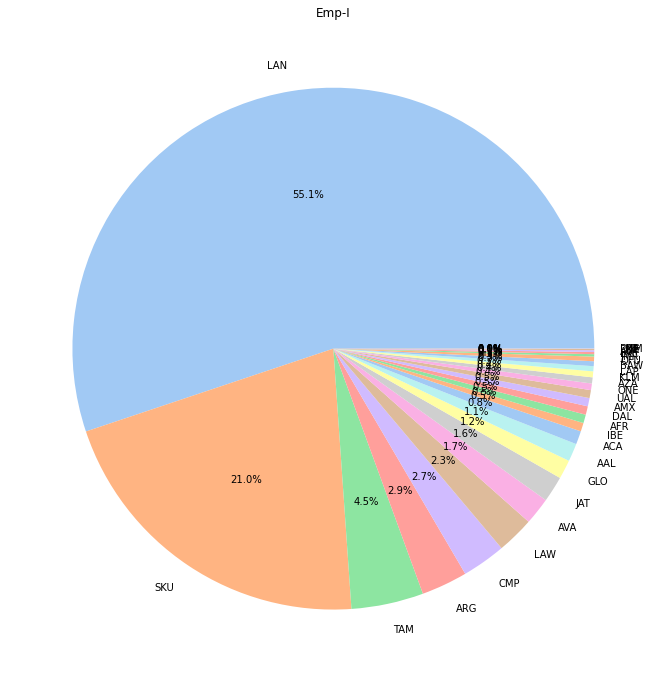

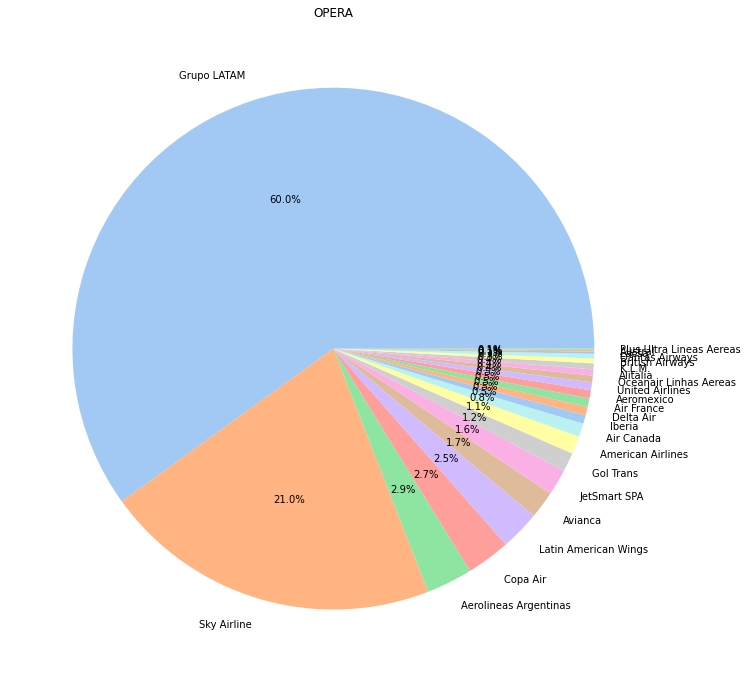

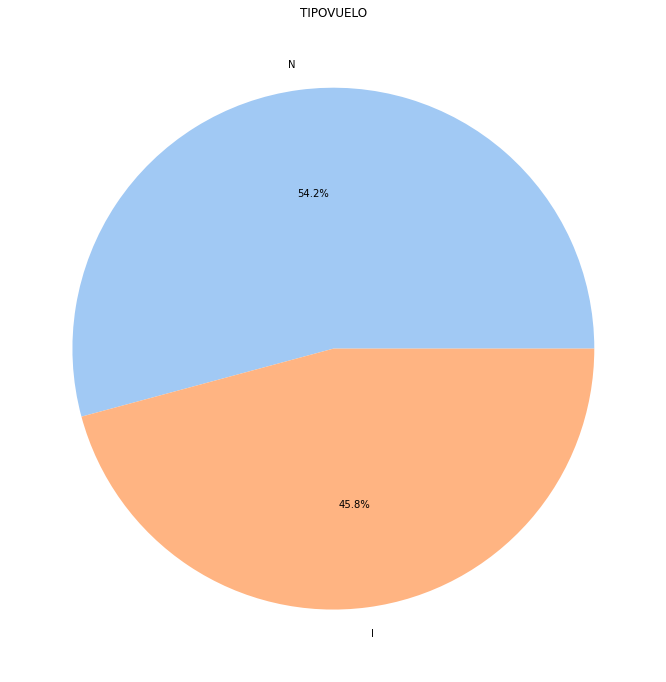

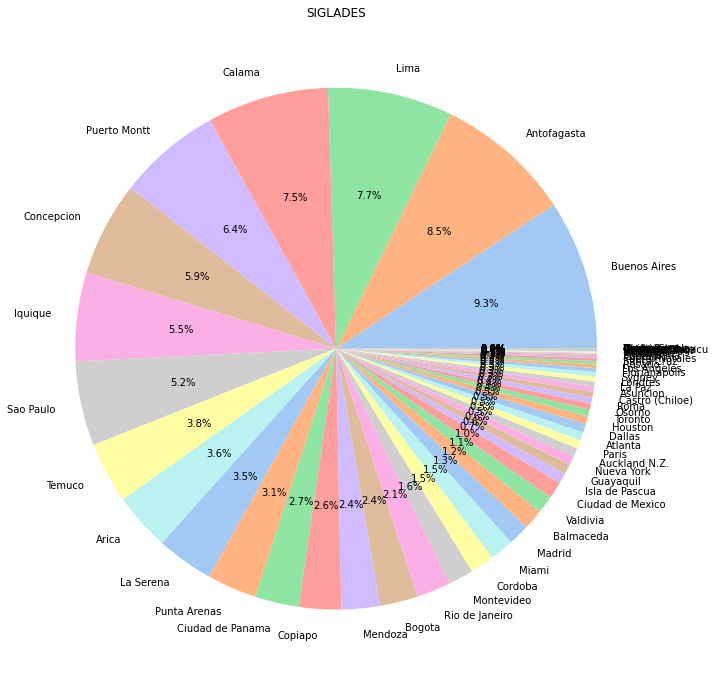

In [29]:
#Top n categorías (cambiar "top" para ver otras opciones)
top=100
df_pie=df[['Emp-I','OPERA', 'TIPOVUELO','SIGLADES']]
for n in range(len(df_pie.columns)):
    colors = sns.color_palette('pastel')[0:len(df_pie[list(df_pie.columns.values)[n]].value_counts())]
    plt.figure(figsize=(12, 12))
    plt.title((df_pie.columns.values)[n])
    plt.pie(df_pie[list(df_pie.columns.values)[n]].value_counts().head(top),labels=df_pie[list(df_pie.columns.values)[n]].value_counts().head(top).index.tolist(), autopct='%1.1f%%', colors=colors)
plt.show()

### Bar_charts_elegidos

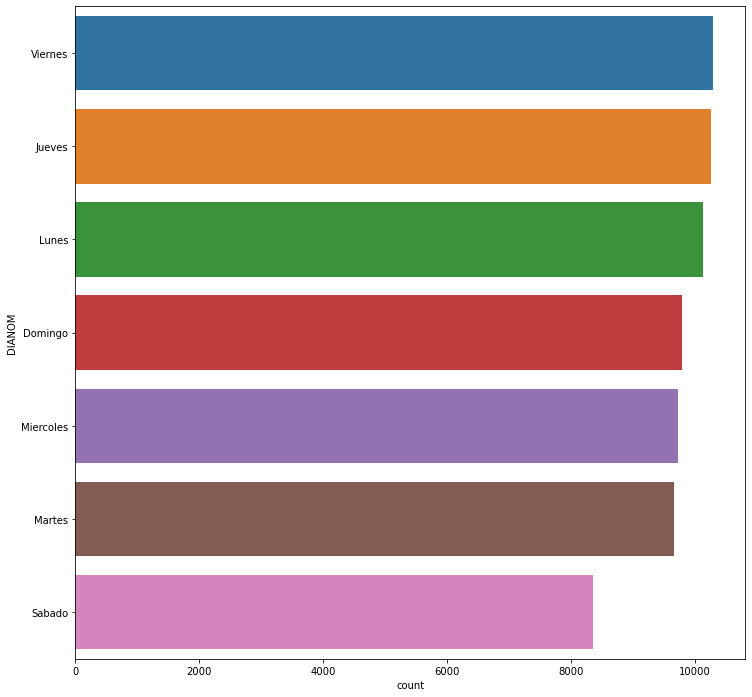

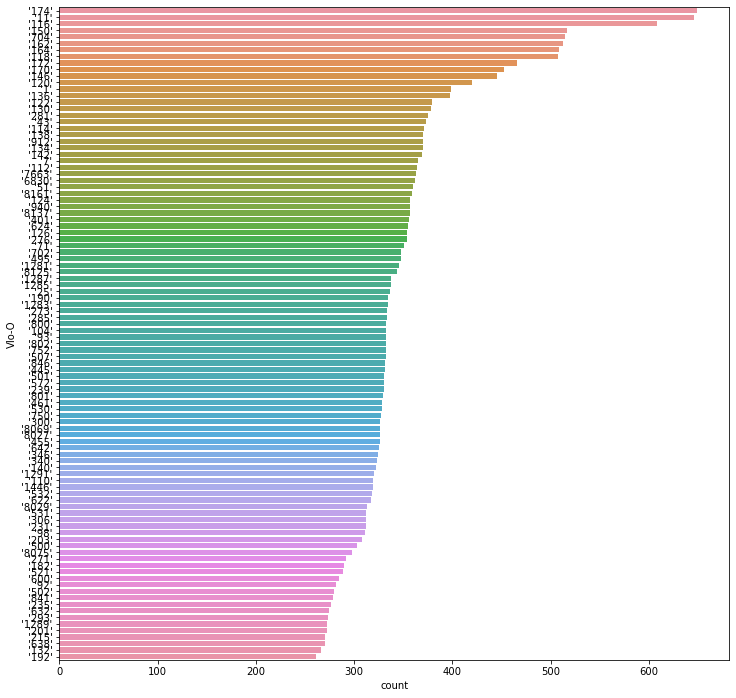

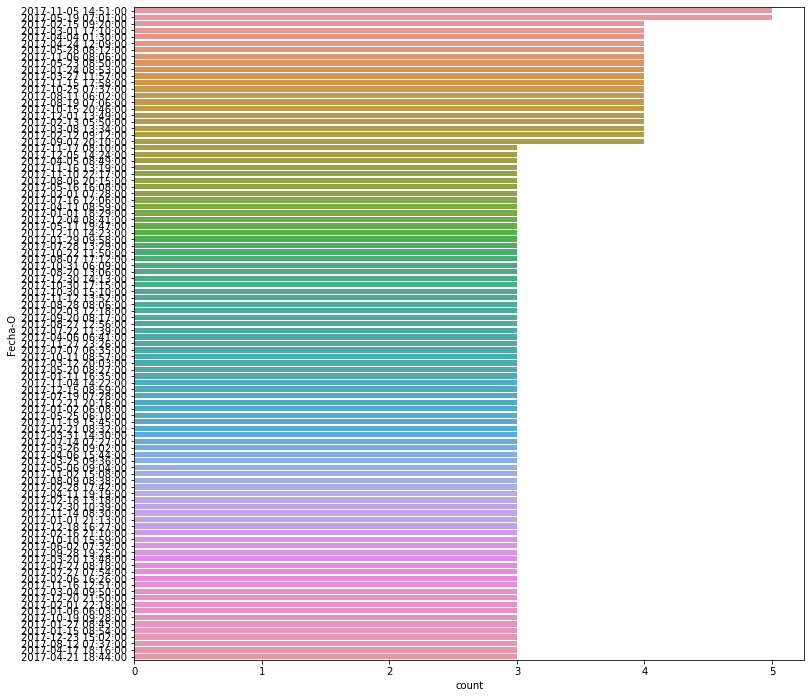

In [48]:
#Top n categorías (cambiar "top" para ver otras opciones)
top=100
df_bar=df[['DIANOM', 'Vlo-O', 'Fecha-O']]
for n in range(len(df_bar.columns)):
    count_order = df_bar[list(df_bar.columns.values)[n]].value_counts().head(top).index
    plt.figure(figsize=(12, 12))
    sns.countplot(data=df_bar, y=list(df_bar.columns.values)[n], order=count_order)
plt.show()


### Capturas_PowerBI

Mapa vuelos Internacionales:  

![title](img/PBI1.png)  

Mapa vuelos Nacionales:  

![title](img/PBI2.png)

Sankey:

![title](img/PBI3.png)

Treemap:  

![title](img/PBI4.png)

Series Temporales Nacionales e Internacionales:    

![title](img/PBI5_N.png)
![title](img/PBI5_I.png)

## Ejercicio 2: New features

2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.  DONE

- dif_min : diferencia en minutos entre Fecha-O y Fecha-I . DONE

- atraso_15 : 1 si dif_min > 15, 0 si no. DONE

- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I . DONE

(Todo comprobado usando la exportación a csv)

In [41]:
#Código que resuelve el Ejercicio 2

df['temporada_alta'] = np.where( ((df['Fecha-I'].dt.month==12) & (df['Fecha-I'].dt.day >=15)) | (df['Fecha-I'].dt.month==1) | (df['Fecha-I'].dt.month==2) | ((df['Fecha-I'].dt.month==3) & (df['Fecha-I'].dt.day <=3)) | ((df['Fecha-I'].dt.month==7) & (df['Fecha-I'].dt.day >=15) &  (df['Fecha-I'].dt.day<=31)) | ((df['Fecha-I'].dt.month==9) & (df['Fecha-I'].dt.day >=11) & (df['Fecha-I'].dt.day <=30)), 1, 0)

#Supuse que las las fechas que separan las temporadas forman parte de la temporada alta, si no es así se puede cambiar muy facilmente 


df['dif_min']= (df['Fecha-O']-df['Fecha-I'])/np.timedelta64(1,'m')

df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0) 


conditions = [(df['Fecha-I'].dt.hour >= 5) & (df['Fecha-I'].dt.hour < 12), (df['Fecha-I'].dt.hour >= 12) & (df['Fecha-I'].dt.hour < 19), (df['Fecha-I'].dt.hour >= 19) | (df['Fecha-I'].dt.hour < 5)]
values = ['mañana', 'tarde', 'noche']
df['periodo_dia'] = np.select(conditions, values)

df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
68201,2017-12-22 14:55:00,'400',SCEL,SPJC,JAT,2017-12-22 15:41:00,'400.0',SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,'400',SCEL,SPJC,JAT,2017-12-25 15:11:00,'400.0',SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,'400',SCEL,SPJC,JAT,2017-12-27 15:35:00,'400.0',SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,'400',SCEL,SPJC,JAT,2017-12-29 15:08:00,'400.0',SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde
68205,2017-12-31 14:55:00,'400',SCEL,SPJC,JAT,2017-12-31 15:04:00,'400.0',SCEL,SPJC,JAT,...,2017,Domingo,I,JetSmart SPA,Santiago,Lima,1,9.0,0,tarde


In [42]:
#Exporto nuevas variables
       
df[['temporada_alta', 'dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv')

### Apendice

In [6]:
#revisemos las información que nos brinda pandas sobre el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [7]:
#descriptive statistics summary variables numérricas
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [9]:
#descriptive statistics summary para variables categóricas
df[['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES']].describe()

C:\Users\ANDREW~1.MER\AppData\Local\Temp/ipykernel_7196/1130334096.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206
unique,53252,584,1,64,30,62774,862,1,63,32,7,2,23,1,62
top,2017-07-28 13:30:00,'174',SCEL,SCFA,LAN,2017-11-05 14:51:00,'174',SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,10292,36966,40892,68206,6335
first,2017-01-01 00:15:00,NaN,NaN,NaN,NaN,2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-31 23:55:00,NaN,NaN,NaN,NaN,2018-01-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Una primera mirada de los datos
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,'226',SCEL,KMIA,AAL,2017-01-01 23:33:00,'226',SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,'226',SCEL,KMIA,AAL,2017-01-02 23:39:00,'226',SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,'226',SCEL,KMIA,AAL,2017-01-03 23:39:00,'226',SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,'226',SCEL,KMIA,AAL,2017-01-04 23:33:00,'226',SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,'226',SCEL,KMIA,AAL,2017-01-05 23:28:00,'226',SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [11]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,'400',SCEL,SPJC,JAT,2017-12-22 15:41:00,'400.0',SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,'400',SCEL,SPJC,JAT,2017-12-25 15:11:00,'400.0',SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,'400',SCEL,SPJC,JAT,2017-12-27 15:35:00,'400.0',SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,'400',SCEL,SPJC,JAT,2017-12-29 15:08:00,'400.0',SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,'400',SCEL,SPJC,JAT,2017-12-31 15:04:00,'400.0',SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [12]:
#Porcentaje de vuelos según aerolínea
df['Emp-O'].value_counts(normalize = True)*100

LAN    30.771486
LXP    21.344163
SKU    20.962965
TAM     4.465883
ARG     2.853121
CMP     2.712371
JMR     2.414744
LPE     1.779902
JAT     1.605431
AVA     1.297540
GLO     1.181714
AAL     1.109873
ACA     0.828373
DSM     0.722810
LNE     0.548339
IBE     0.530745
AFR     0.524881
DAL     0.524881
LRC     0.523414
AMX     0.514617
UAL     0.491159
ONE     0.409055
AZA     0.379732
KLM     0.368003
LAP     0.321086
BAW     0.300560
QFA     0.285899
AUT     0.112893
PUE     0.071841
56R     0.024924
48O     0.014661
TPU     0.002932
Name: Emp-O, dtype: float64

In [47]:
#Número de vuelos por código de vuelo
df['Vlo-O'].value_counts()

'174'      649
'11'       646
'116'      608
'150'      517
'704'      514
          ... 
'1052'       1
'1051'       1
'1050'       1
'356'        1
'180.0'      1
Name: Vlo-O, Length: 862, dtype: int64

### Pie_charts

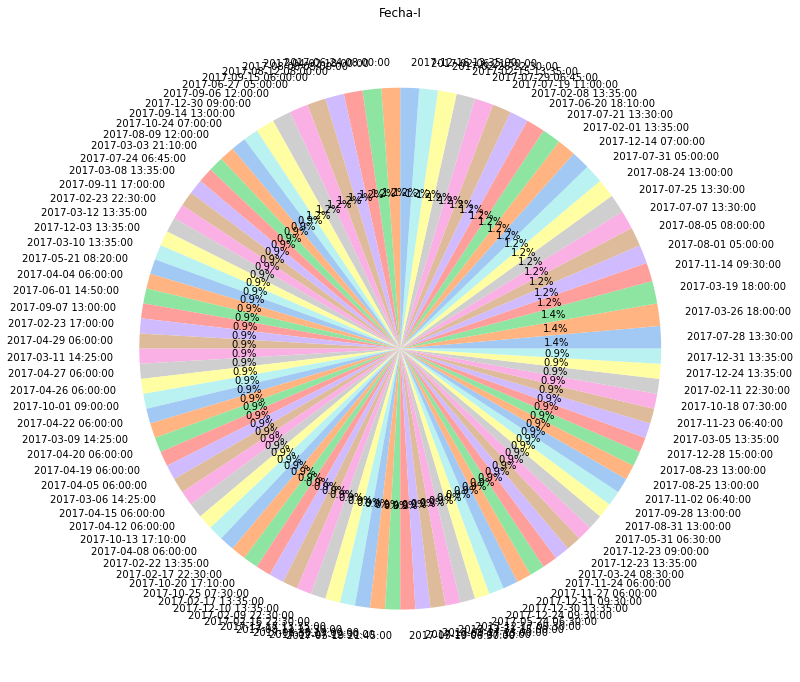

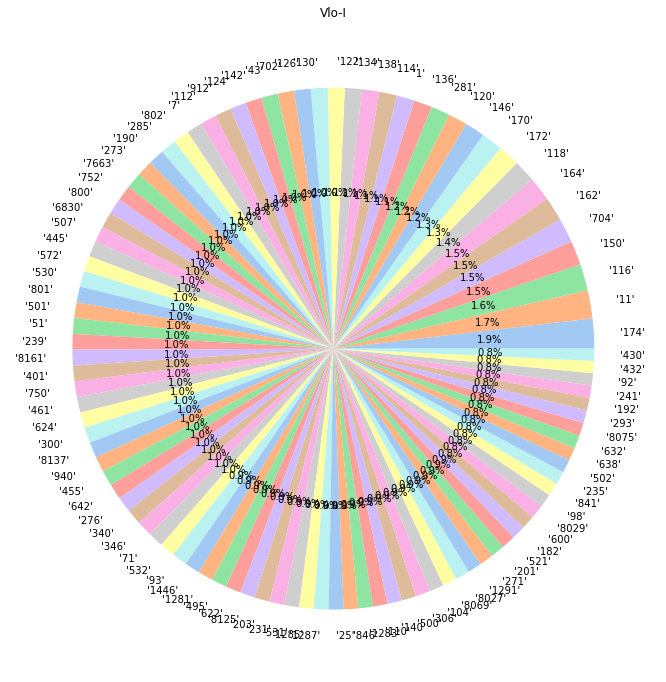

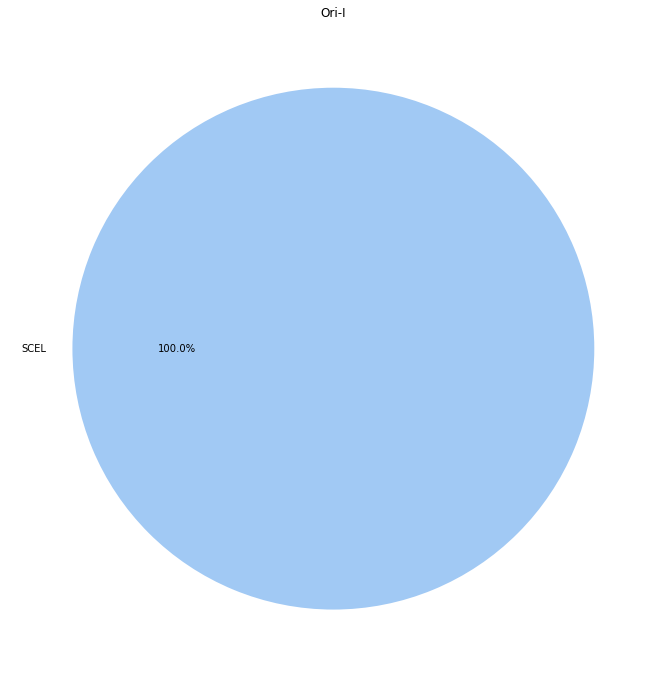

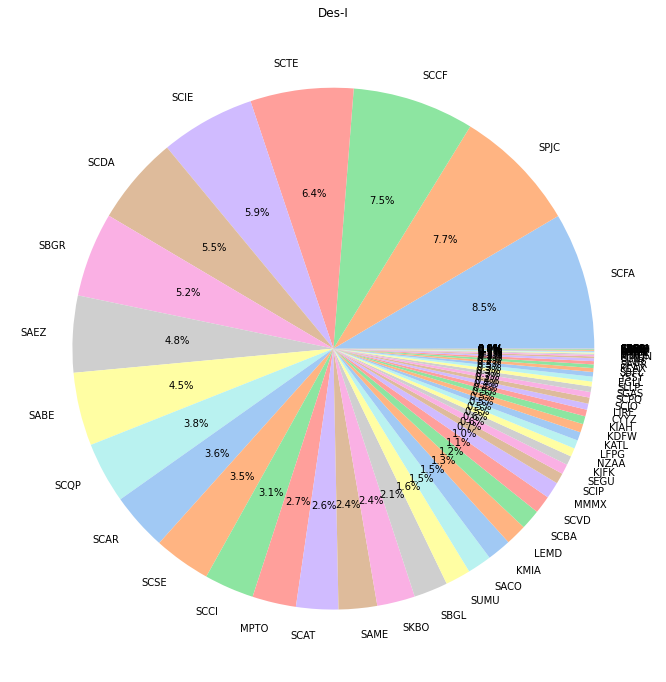

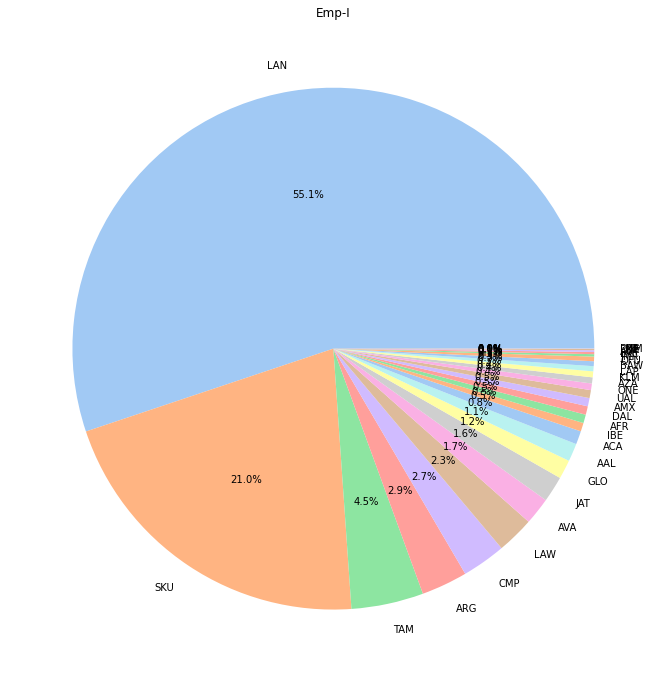

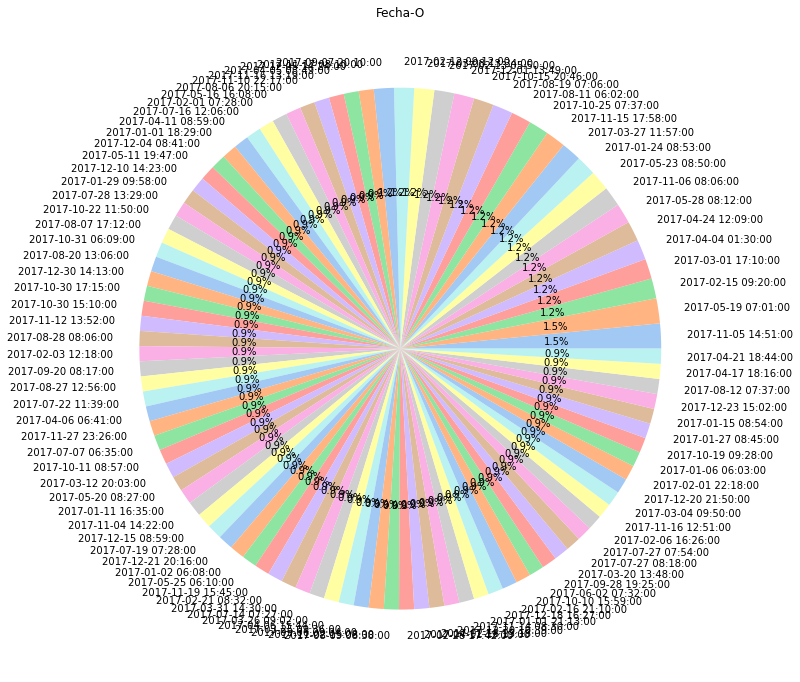

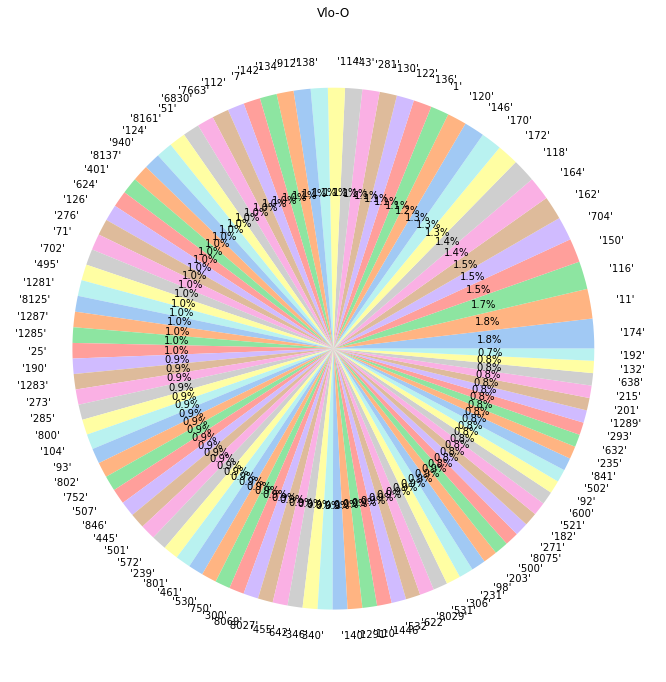

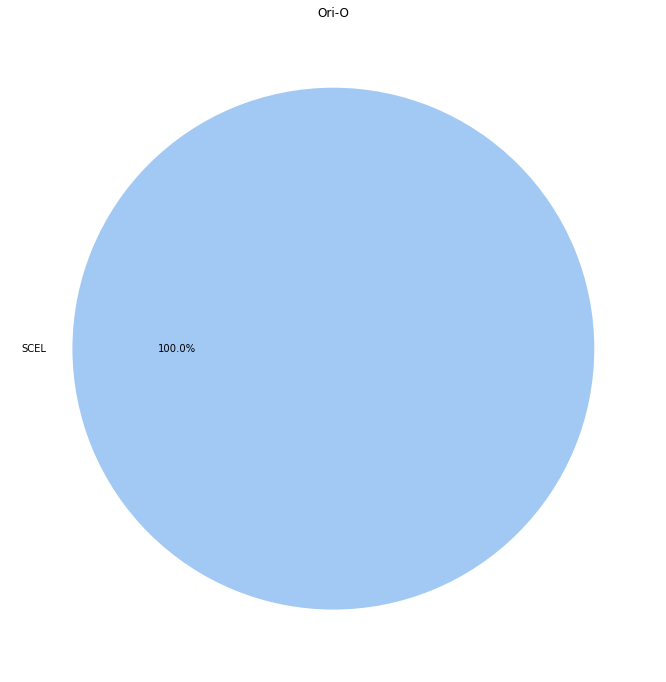

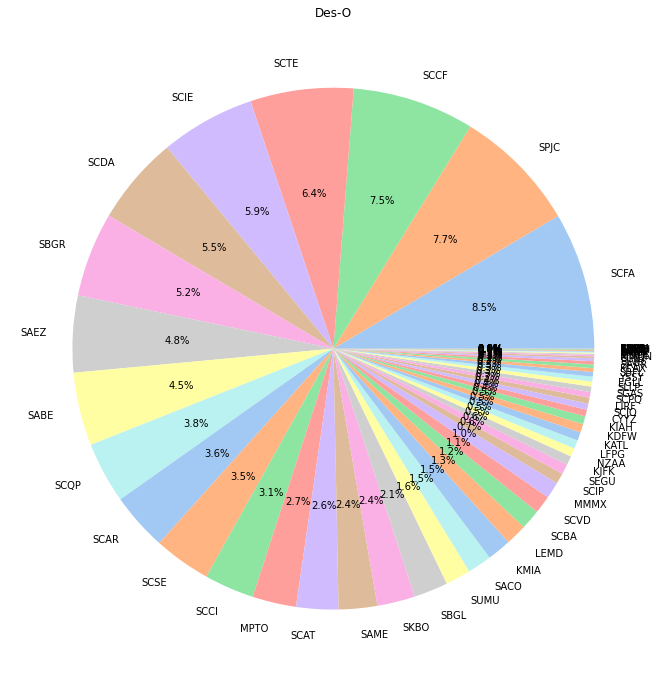

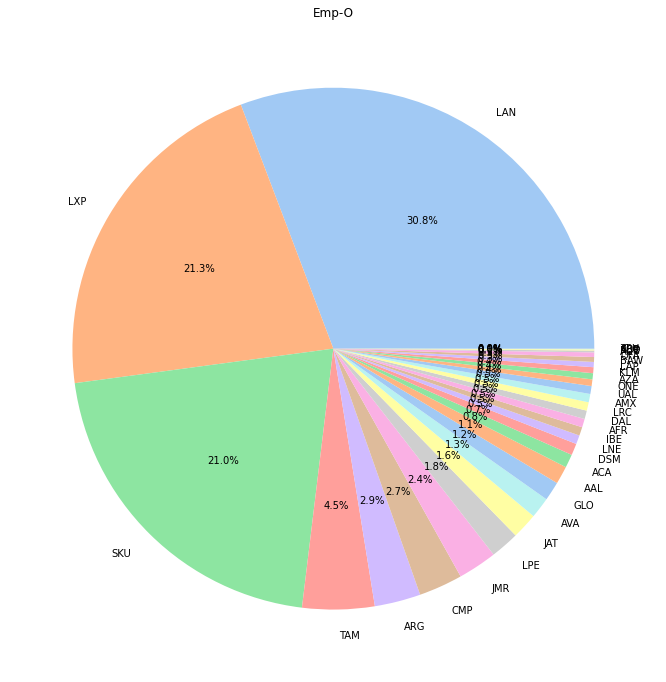

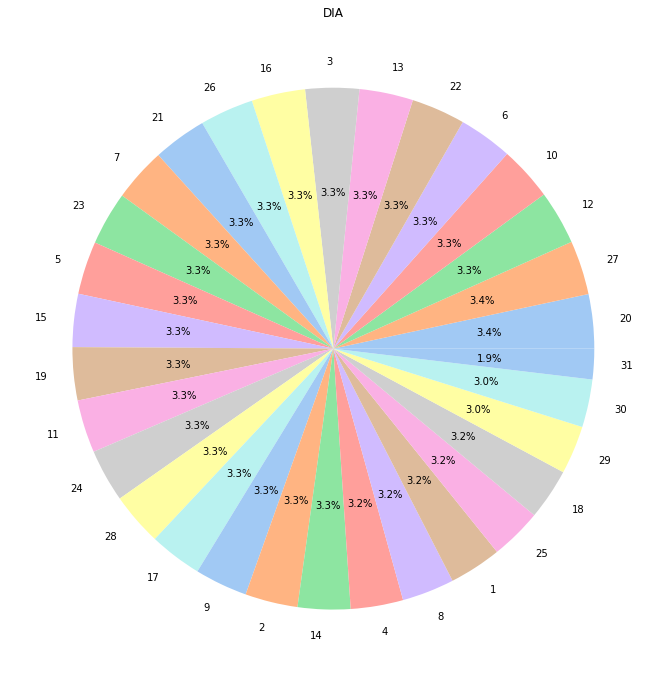

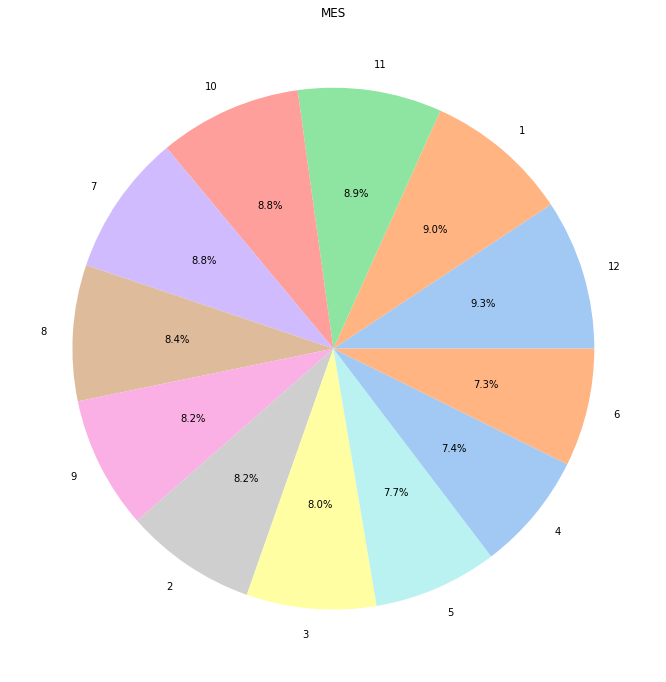

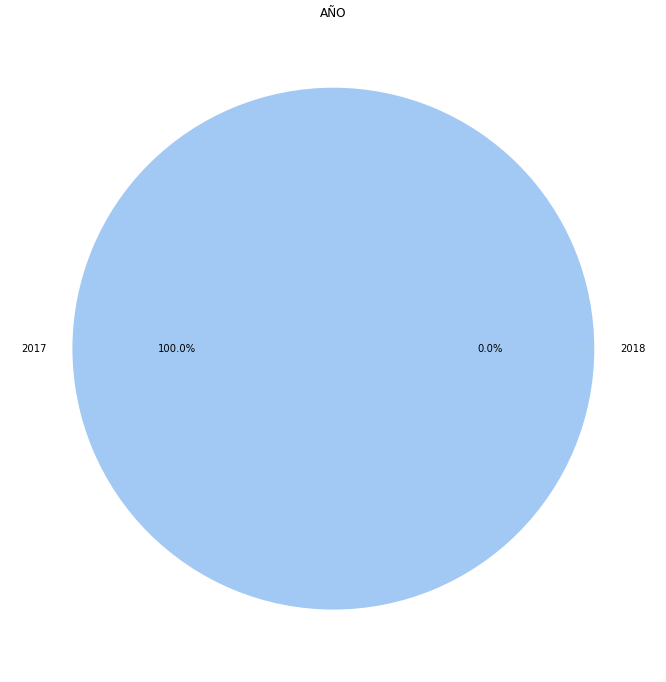

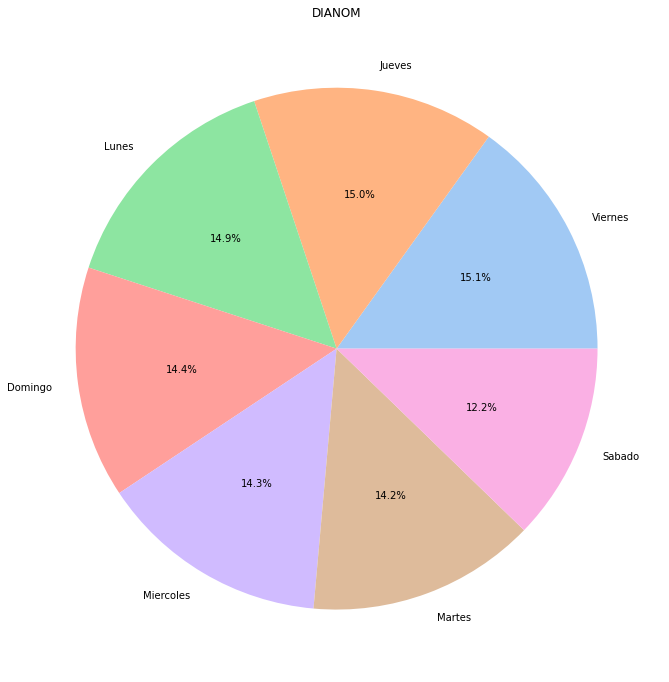

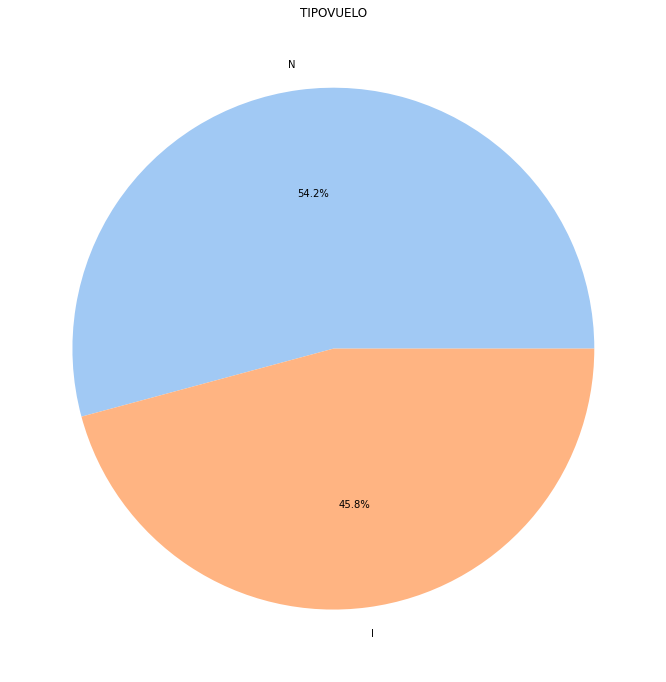

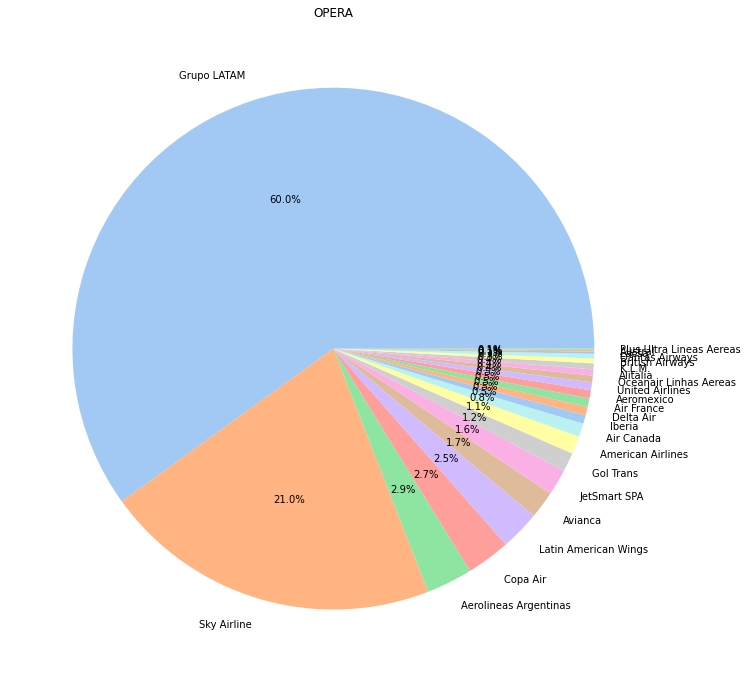

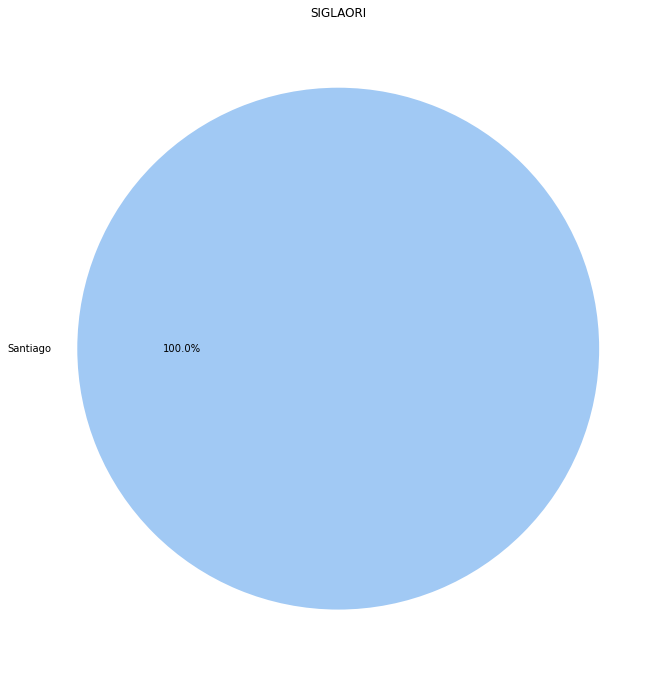

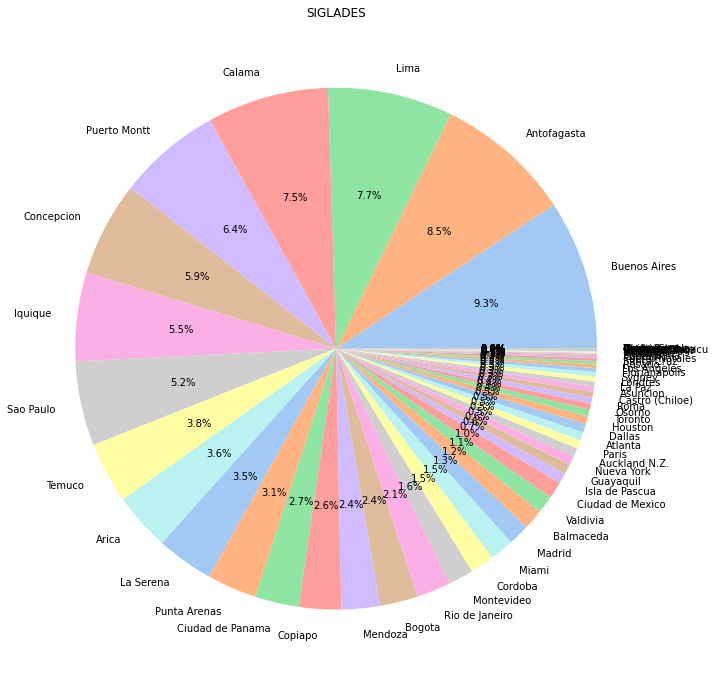

In [30]:
#Top n categorías (cambiar "top" para ver otras opciones)
top=100

for n in range(len(df.columns)):
    colors = sns.color_palette('pastel')[0:len(df[list(df.columns.values)[n]].value_counts())]
    plt.figure(figsize=(12, 12))
    plt.title((df.columns.values)[n])
    plt.pie(df[list(df.columns.values)[n]].value_counts().head(top),labels=df[list(df.columns.values)[n]].value_counts().head(top).index.tolist(), autopct='%1.1f%%', colors=colors)
plt.show()

### Bar_charts

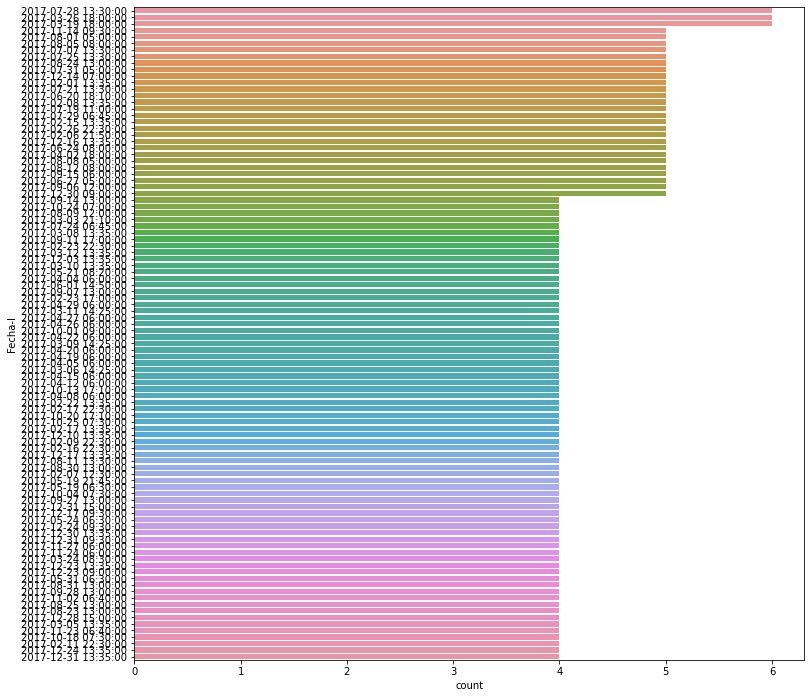

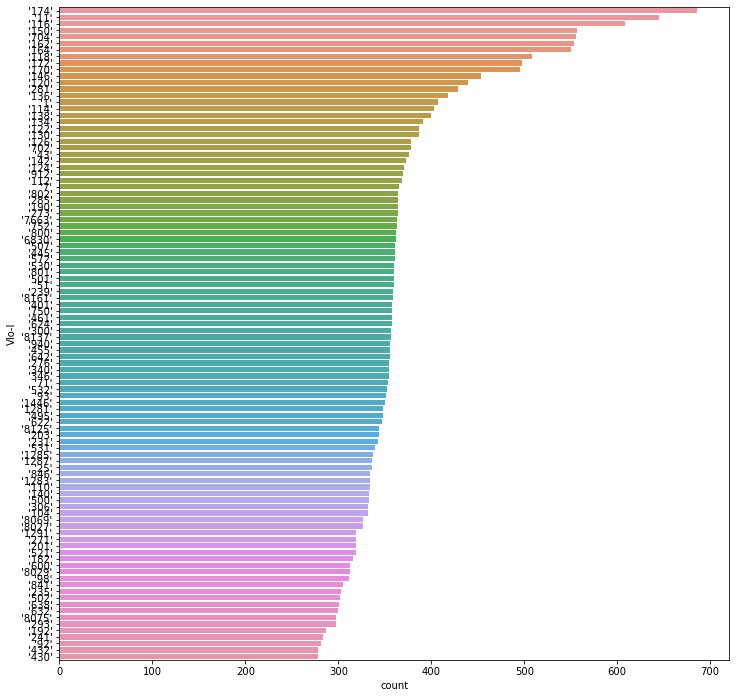

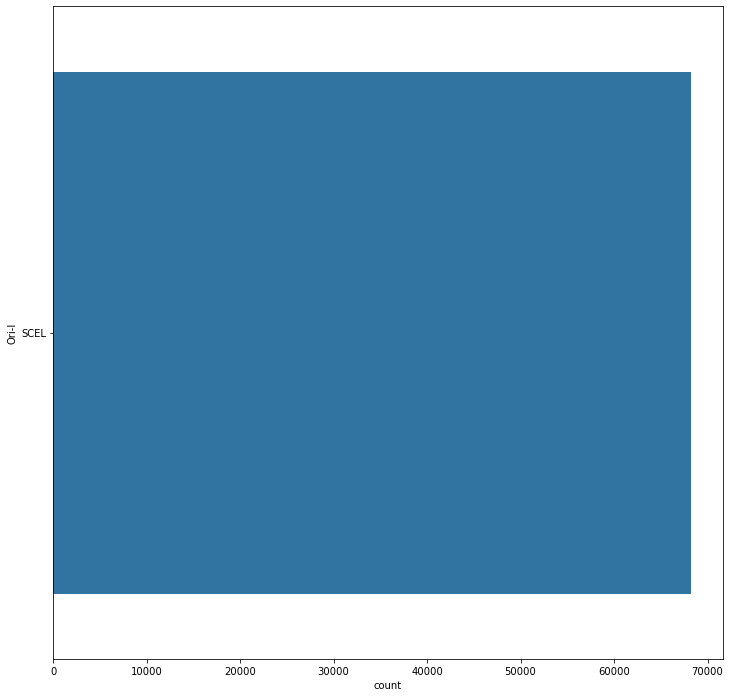

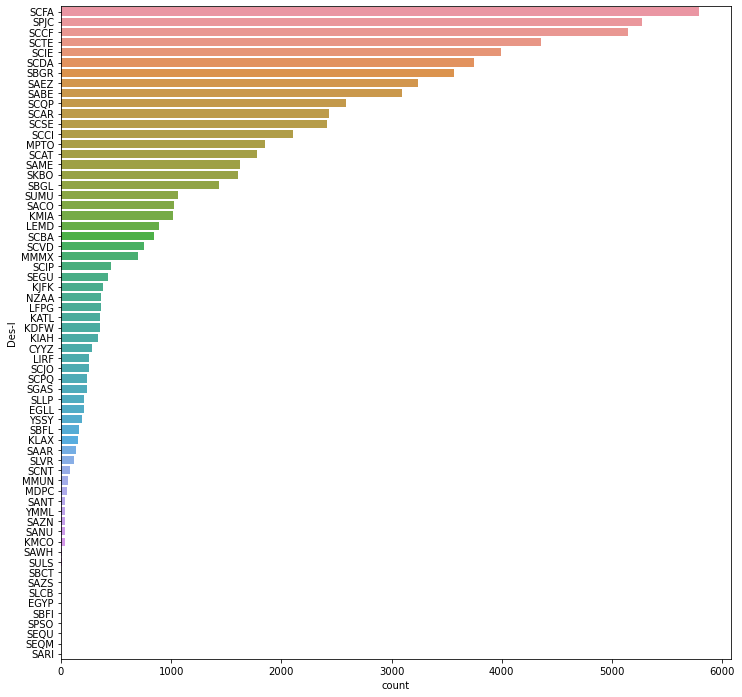

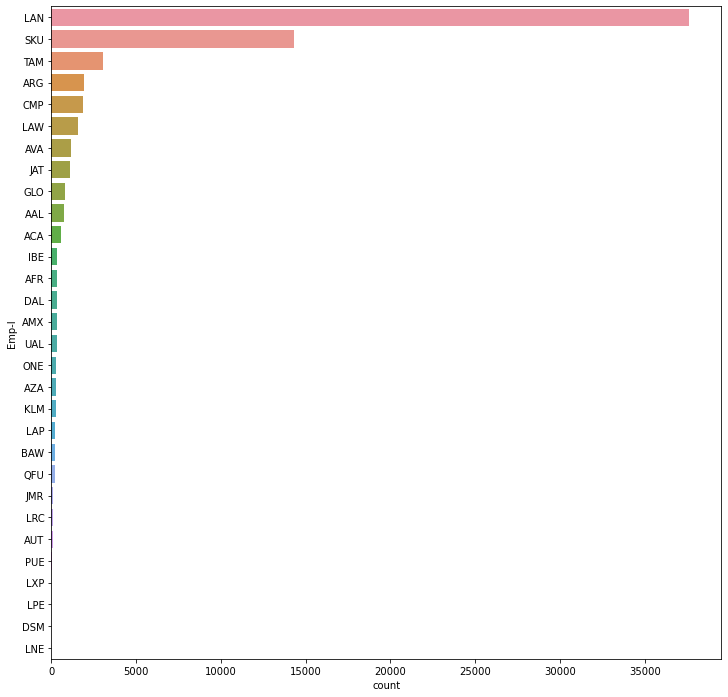

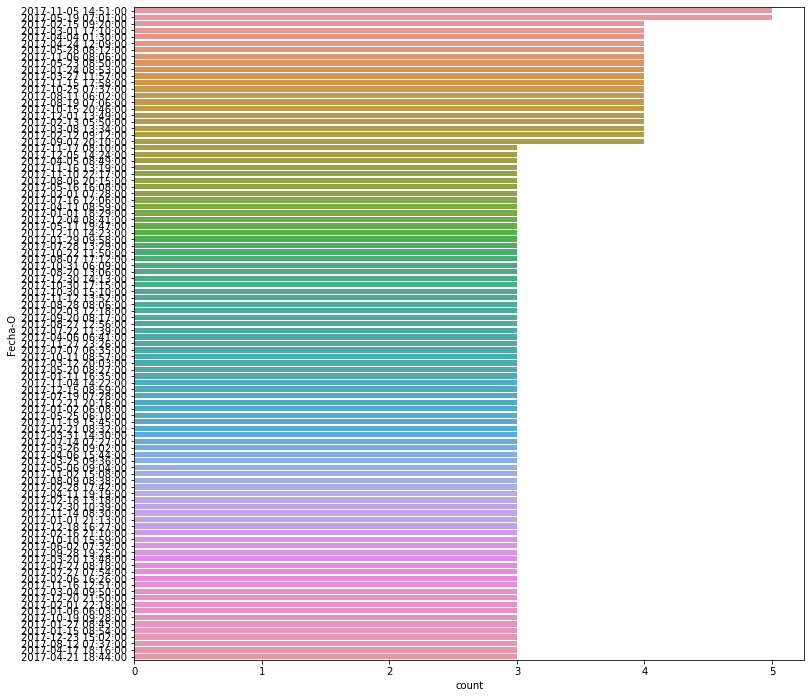

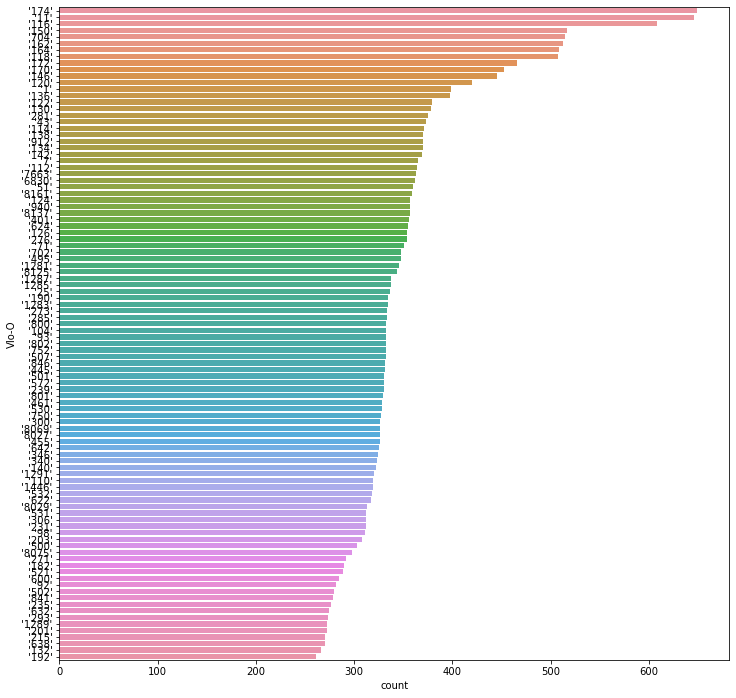

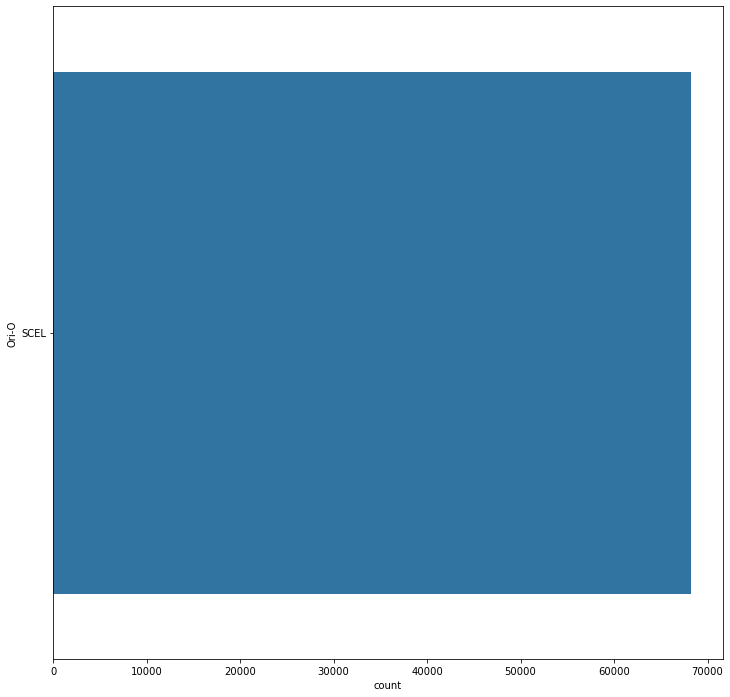

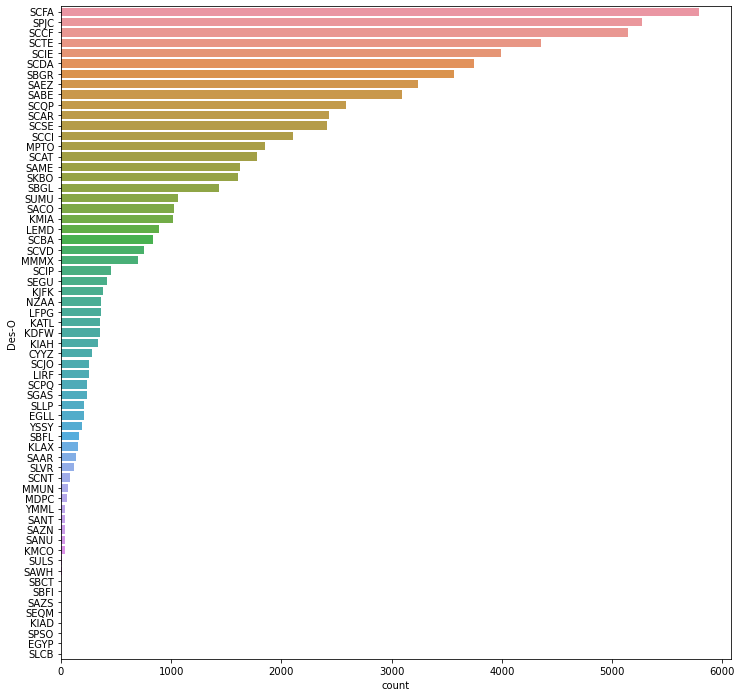

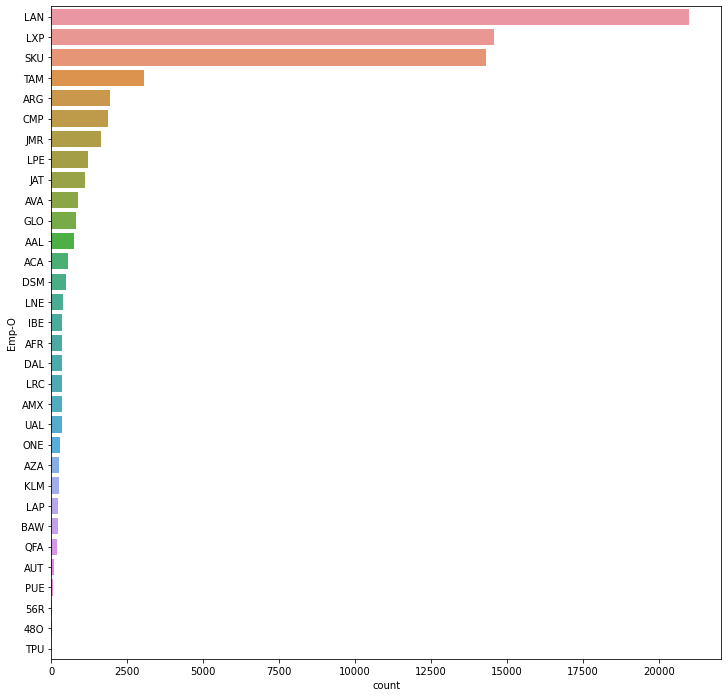

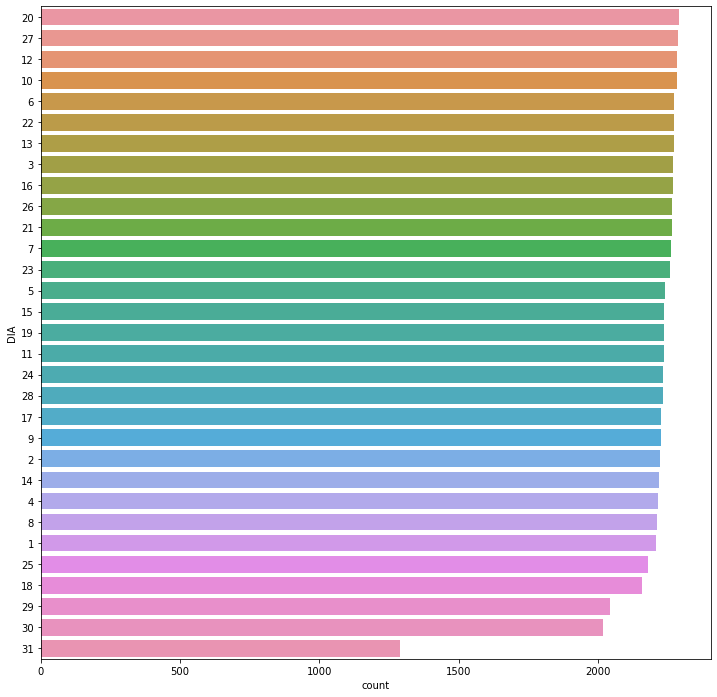

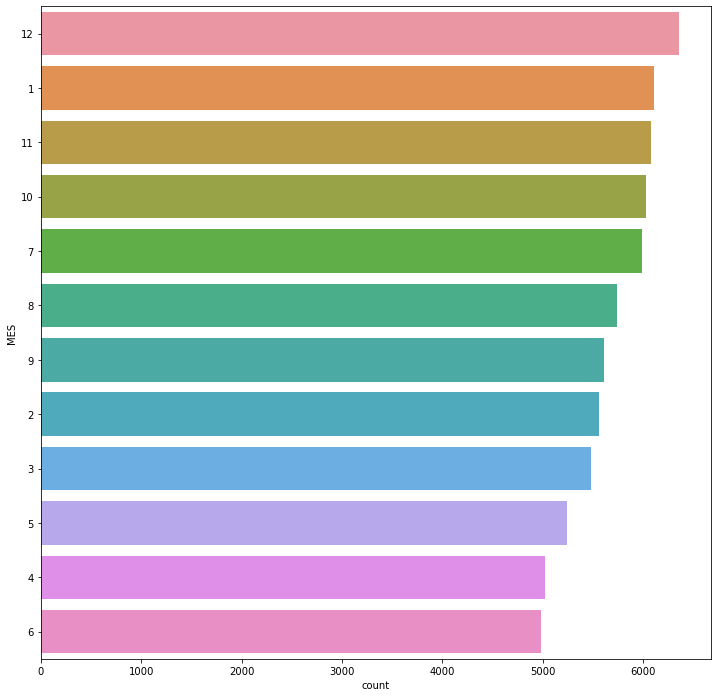

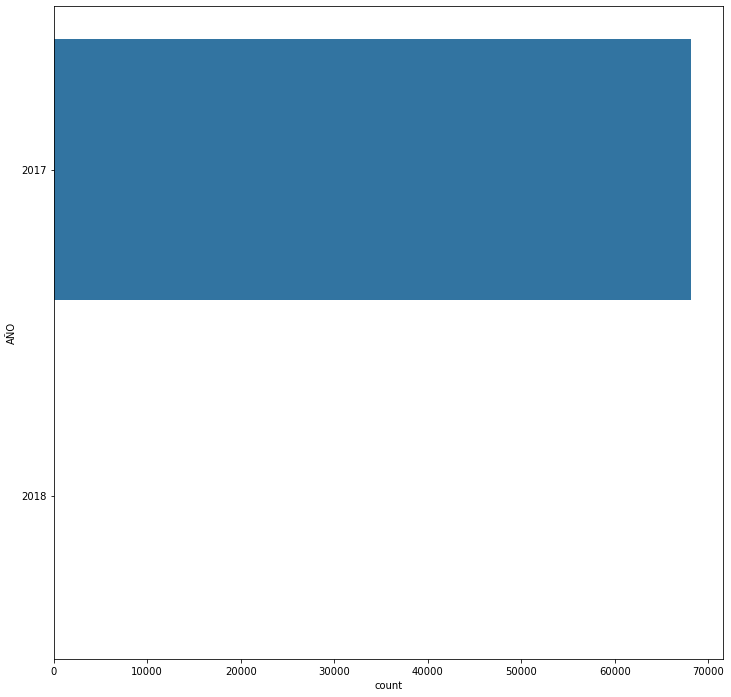

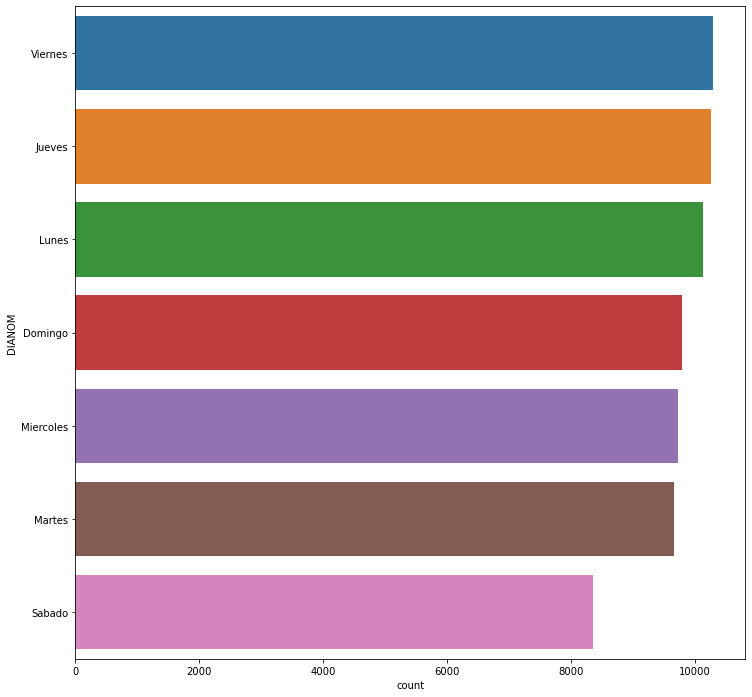

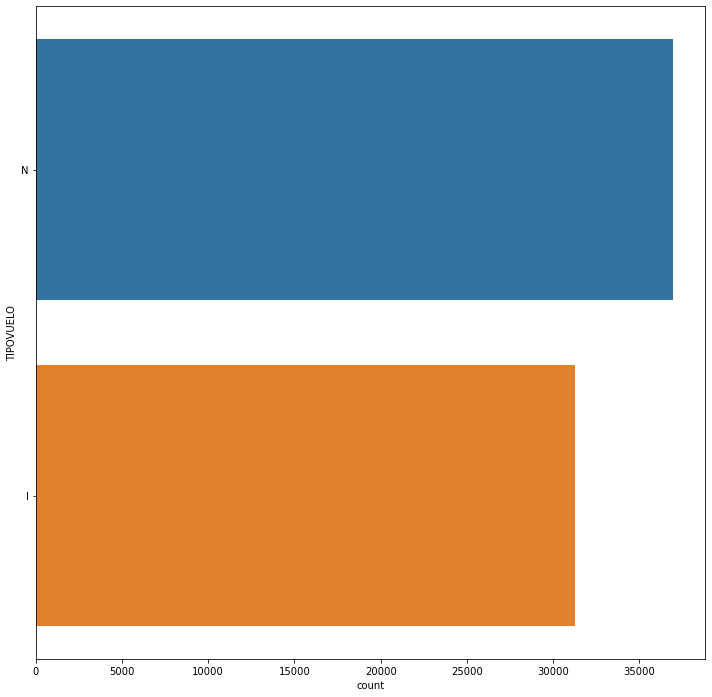

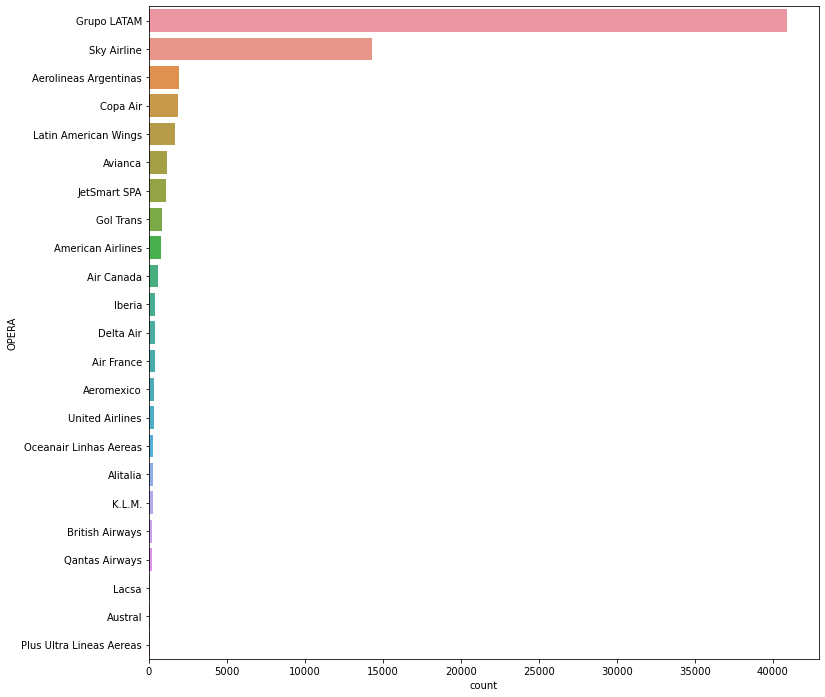

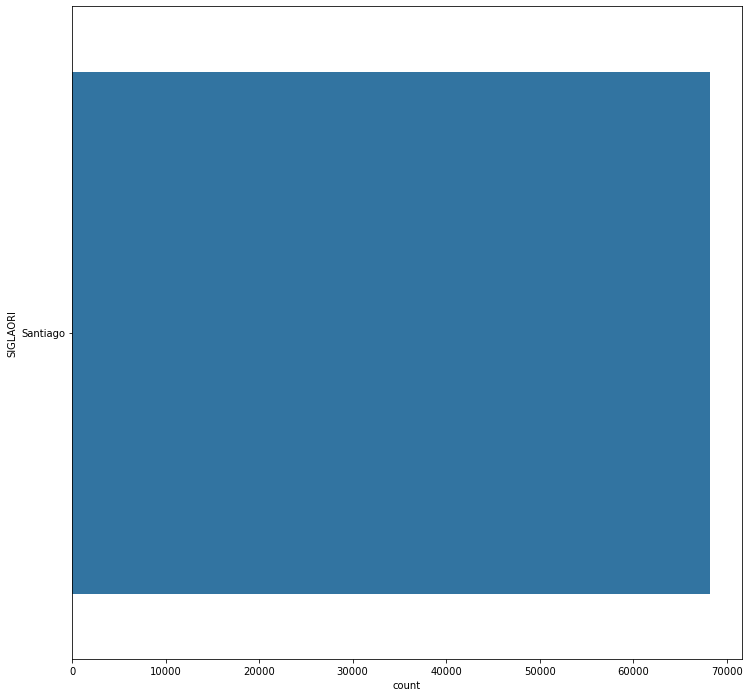

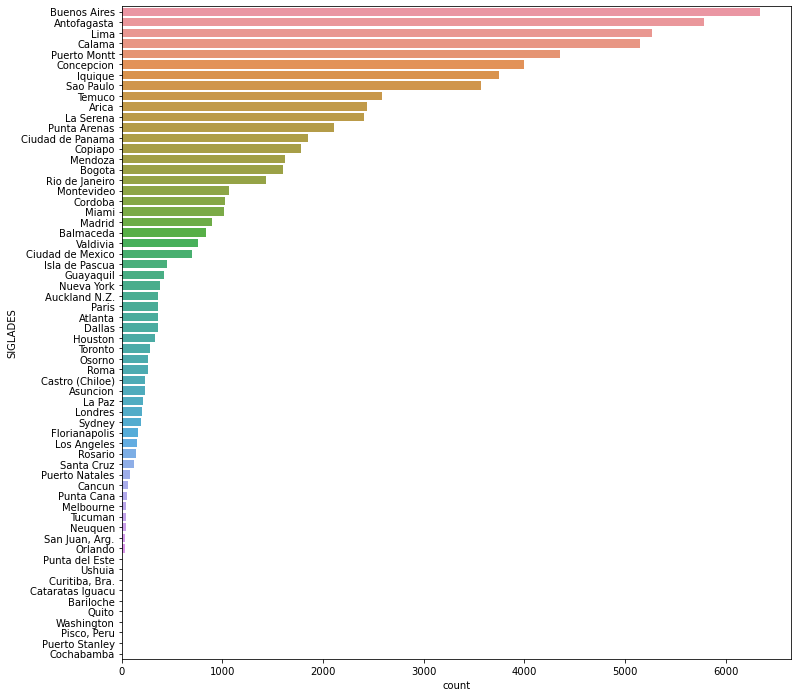

In [14]:
#Top n categorías (cambiar "top" para ver otras opciones)
top=100

for n in range(len(df.columns)):
    count_order = df[list(df.columns.values)[n]].value_counts().head(top).index
    plt.figure(figsize=(12, 12))
    sns.countplot(data=df, y=list(df.columns.values)[n], order=count_order)
plt.show()
